In [2]:
import numpy as np
from scipy.special import comb, factorial
import matplotlib.pyplot as plt

In [3]:
def meld_chance(chance, amount):
    return 1 - (1-chance) ** amount

In [4]:
def meld_distributions(chance, slots, max_trials = 500):
    """Calculates the probability of successfully melding x slots with y chance after z trials

    Args:
        chance ([float]): Chance to meld. Float in range [0, 1]
        slots ([int]): Number of slots to meld. Positive integer.
        single_cap (int, optional): Maximum number of trials (materia) calculated. Defaults to 30.
    """
    success_chances = []
    for trials in range(slots, max_trials):
        # calculate chance of at least <slots> successes after <trials> trials
        success_chance = 0
        for successes in range(slots, trials+1):
            # Calculate binomial probability
            success_chance += comb(trials, successes) * (chance ** successes) * ((1-chance) ** (trials-successes))
        success_chances.append(success_chance)
    return(success_chances)

In [5]:
def plot_chances(chance, slots, max_trials):
    chances = meld_distributions(chance, slots, max_trials)
    print(sum(chances[:100]))
    #chances= [sum(chances[:i]) for i in range(len(chances))]
    with open(f"meld_{chance}:{slots}.csv", "w+") as f:
        for i in range(len(chances)):
            f.write(f"{i+slots},{chances[i]}\n")
    
    plt.figure(figsize=(10, 6), facecolor="white")
    plt.title(f"{int(chance*100)}% Meld Chance Success Rate ({slots} Slots)")
    plt.xlabel("Number of Materia Used")
    plt.ylabel("Success Chance")
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xticks(np.arange(slots, max_trials, (max_trials-slots+1)/(10* 10/6)))
    plt.plot(np.arange(slots, max_trials), chances)
    plt.grid(True)
    plt.savefig(f"{int(chance*100)}.png")
    plt.show()

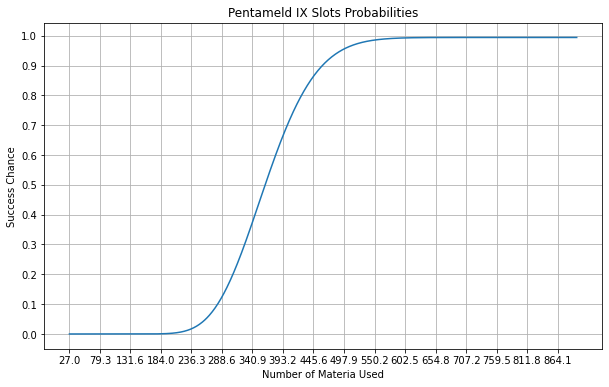

In [14]:
def meld_distributions_exact(chance, slots, max_trials = 500):
    success_chances = []
    for trials in range(slots, max_trials):
        # Calculate binomial probability
        success_chance = comb(trials-1, slots-1) * (chance ** slots) * ((1-chance) ** (trials-slots))
        success_chances.append(success_chance)
    return(success_chances)

def combined_probabilities():
    a = meld_distributions_exact(0.10, 11, 220)
    b = meld_distributions_exact(0.07, 11, 320)
    c = meld_distributions_exact(0.05, 5, 270)

    joint = dict()

    for i in range(len(a)):
        for j in range(len(b)):
            for k in range(len(c)):
                p1 = i+11
                p2 = j+11
                p3 = k+5
                if p1+p2+p3 in joint.keys():
                    joint[p1+p2+p3] += a[i] * b[j] * c[k]
                else:
                    joint[p1+p2+p3] = a[i] * b[j] * c[k]
                
                if joint[p1+p2+p3] > 1:
                    print("DEBUG")
                    print(i, j, k)
                    print(a[i], b[j], c[k])
    
    min = 11+11+5
    max = 11+219+11+319+5+269
    probs = list(joint.values())
    cumulative = [sum(probs[:i]) for i in range(len(probs))]
    
    plt.figure(figsize=(10, 6), facecolor="white")
    plt.title("Pentameld IX Slots Probabilities")
    plt.xlabel("Number of Materia Used")
    plt.ylabel("Success Chance")
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xticks(np.arange(min, len(cumulative)+min, (len(cumulative)+1)/(10* 10/6)))
    plt.plot(np.arange(min, len(cumulative)+min), cumulative)
    plt.grid(True)

combined_probabilities()

46.419522976052825


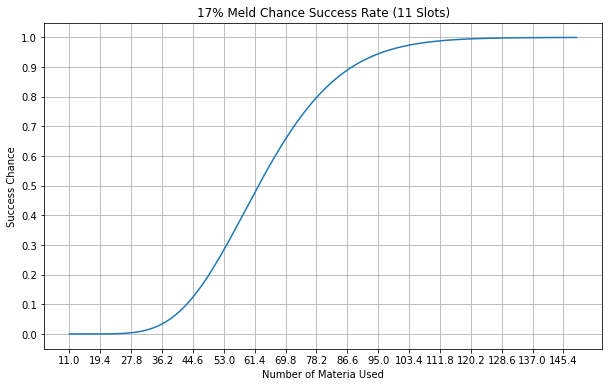

In [7]:
plot_chances(0.17, 11, 150)

13.003116043777375


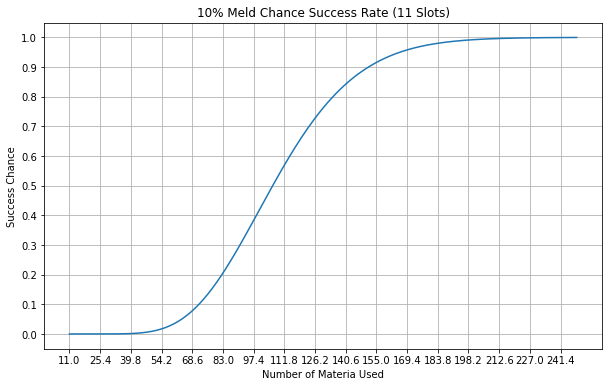

In [8]:
plot_chances(0.1, 11, 250)

2.523858460319087


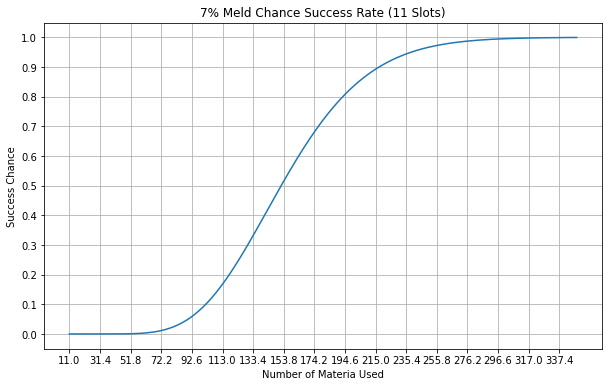

In [9]:
plot_chances(0.07, 11, 350)

20.009882018365484


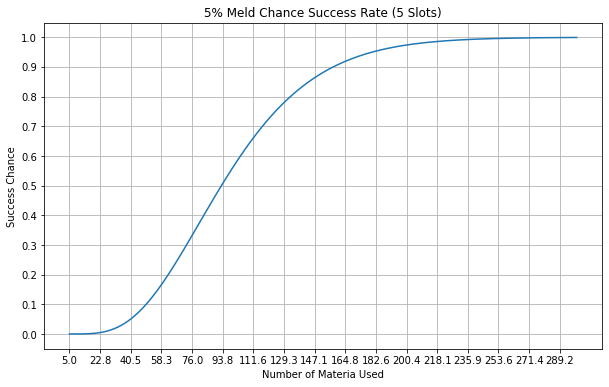

In [10]:
plot_chances(0.05, 5, 300)